In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 63.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.6/7.6 MB 94.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.3/190.3 KB 25.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.5/250.5 KB 9.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 48.7 MB/s eta 0:00:00
     ‚îÅ‚

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import tqdm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import gc
from tqdm.autonotebook import tqdm

from sklearn.metrics import accuracy_score,f1_score

import sklearn

import torch
from simpletransformers.classification import ClassificationModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
train = pd.read_csv("/content/I-Sarcasm_train_.csv")
test = pd.read_csv("/content/I-Sarcasm_test_.csv")

In [5]:
train.tweet[0]

"It's been a while since I visited my grandparents.#wait"

In [6]:
test.head()

tweet_id                                              tweet  \
0   933721764970057000  Gandhis busy, Congress delays UP brainstorming...   
1  1086119014131200000  George and the Ice Cream Castle - Charlie and ...   
2   657671293756567000  Hartford House Delegation Scores Funding For C...   
3   914242426755256000  Obama to rename tallest U.S. peak: To hear the...   
4  1088604537211040000  So @elonmusk couldn‚Äôt care less I guess ü§∑üèª‚Äç‚ôÇÔ∏è ...   

   sarcasm_label sarcasm_type  
0      sarcastic      sarcasm  
1  not_sarcastic          NaN  
2  not_sarcastic          NaN  
3  not_sarcastic          NaN  
4      sarcastic       satire

In [7]:
train.isna().sum()

tweet_id            0
tweet               0
sarcasm_label       0
sarcasm_type     2298
dtype: int64

In [8]:
train["sarcasm_type"].fillna("No sarcasm",inplace=True)
train.head()

tweet_id                                              tweet  \
0   992251158159765000  It's been a while since I visited my grandpare...   
1  1084373658745870000  Well done Monty. Mark that up as your first ev...   
2            812181186  @davesnyder since this is fantasy can it be an...   
3  1090276741329920000  Really? I don't think you know what you are ta...   
4   553070692682723000  Missed #ToughEnough tonight? No worries. Just ...   

   sarcasm_label sarcasm_type  
0  not_sarcastic   No sarcasm  
1  not_sarcastic   No sarcasm  
2  not_sarcastic   No sarcasm  
3  not_sarcastic   No sarcasm  
4      sarcastic      sarcasm

In [9]:
test.isna().sum()

tweet_id           0
tweet              0
sarcasm_label      0
sarcasm_type     640
dtype: int64

In [10]:
test["sarcasm_type"].fillna("No sarcasm",inplace=True)
test.head()

tweet_id                                              tweet  \
0   933721764970057000  Gandhis busy, Congress delays UP brainstorming...   
1  1086119014131200000  George and the Ice Cream Castle - Charlie and ...   
2   657671293756567000  Hartford House Delegation Scores Funding For C...   
3   914242426755256000  Obama to rename tallest U.S. peak: To hear the...   
4  1088604537211040000  So @elonmusk couldn‚Äôt care less I guess ü§∑üèª‚Äç‚ôÇÔ∏è ...   

   sarcasm_label sarcasm_type  
0      sarcastic      sarcasm  
1  not_sarcastic   No sarcasm  
2  not_sarcastic   No sarcasm  
3  not_sarcastic   No sarcasm  
4      sarcastic       satire

In [11]:
# train_data=keep_uniques(train_tweets, train_data)
# test_data=keep_uniques(test_tweets, test_data)
train.drop("tweet_id",inplace=True,axis=1)

In [12]:
test.drop("tweet_id",inplace=True,axis=1)

In [13]:
# df = pd.read_csv(file_path, dtype={"col2": str})
# df['col2'] = df['col2'].astype(str)


In [14]:
train.sarcasm_type.replace("#news #live #breakingnews Premarket: Blood-letting eases for global stocks, but China smashed again","No sarcasm",inplace=True)

In [15]:
train.describe().T

count unique                                                top  \
tweet          3577   3523  LOL...Walker is talking about education...the ...   
sarcasm_label  3577      2                                      not_sarcastic   
sarcasm_type   3577      7                                         No sarcasm   

               freq  
tweet             3  
sarcasm_label  2297  
sarcasm_type   2299

In [16]:
train = train.sample(frac = 1)
test = test.sample(frac = 1)

**Value counts of individual sarcasm labels**

In [17]:
train.sarcasm_label.value_counts()

not_sarcastic    2297
sarcastic        1280
Name: sarcasm_label, dtype: int64

**Countplot sarcasm_label(s)**

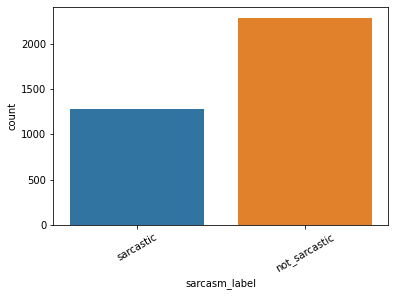

In [18]:
sns.countplot(train.sarcasm_label)
sns.set(rc={'figure.figsize':(7,8)})
plt.xticks(rotation=30);

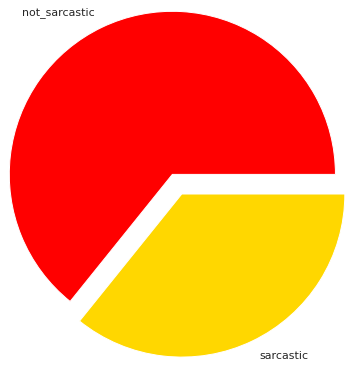

In [19]:
# pie chart using seaborn based on total count of different sentiments in training dataset 

explode = [0.1, 0.1]
train.sarcasm_label.value_counts().plot(kind='pie',explode=explode,figsize=(5,5),radius=1.5,colors=["red", "gold", "green",'blue','purple','red']);


**Value counts of individual sarcasm types**

In [20]:
train.sarcasm_type.value_counts()

No sarcasm             2299
sarcasm                 880
irony                   261
overstatement            47
rhetorical question      43
satire                   39
understatement            8
Name: sarcasm_type, dtype: int64

**Countplot of various sarcasm_type(s**

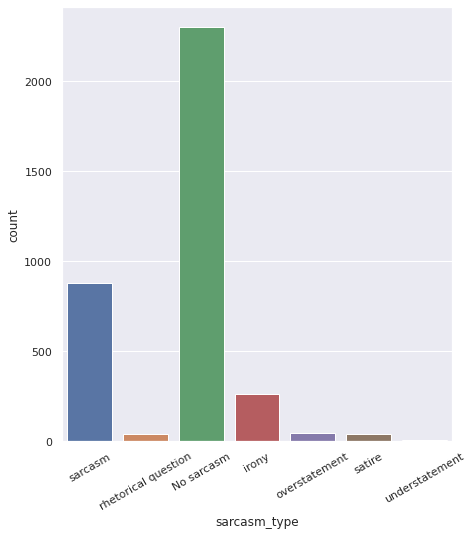

In [21]:
sns.countplot(train.sarcasm_type)
sns.color_palette("mako", as_cmap=True)

plt.xticks(rotation=30);

**Piechart depecting sarcasm_type**

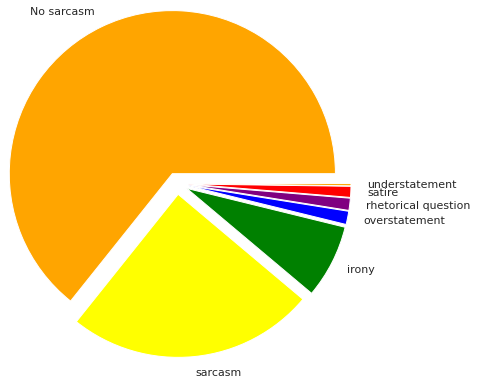

In [22]:
# pie chart using seaborn based on total count of different sentiments in training dataset 

explode = [0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1]
sns.set_theme(style="whitegrid")
train.sarcasm_type.value_counts().plot(kind='pie',explode=explode,figsize=(5,5),radius=1.5,colors=["orange", "yellow", "green",'blue','purple','red']);


In [23]:
train

tweet  sarcasm_label  \
1842  But it's "recovering!" #sarcasm //Home ownersh...      sarcastic   
2039  Welp, no sleep for me tonight. Why is the fina...      sarcastic   
1186  Anchor Jorge Ramos Thrown Out of Trump Event, ...  not_sarcastic   
2078  Fucking Fuck Fuck Fuckety Fuck #White #Mug by ...      sarcastic   
1838  My recent string of luck has been wonderful, a...      sarcastic   
...                                                 ...            ...   
1396  @aseesman hey buddy are you up? We're supposed...  not_sarcastic   
2566  #Missouri #Police Misconduct Still At An All T...  not_sarcastic   
2349  Love a long gray ponytail &amp; breeches - on ...      sarcastic   
404   Supporters of Iran agreement feel momentum on ...  not_sarcastic   
2714  @MikeGiardi @PP_Rich_Hill I'm amazed RG was mo...      sarcastic   

             sarcasm_type  
1842              sarcasm  
2039  rhetorical question  
1186           No sarcasm  
2078              sarcasm  
1838              sarcasm  
...                   ...  
1396           No sarcasm  
2566           No sarcasm  
2349              sarcasm  
404            No sarcasm  
2714              sarcasm  

[3577 rows x 3 columns]

In [24]:
# # Create a dataframe with the tweets data
# data = {'Tweet': train.tweet, 'Sarcasm': train.sarcasm_label}
# df = pd.DataFrame(data)

# # Create a pivot table with the sarcasm scores for each tweet
# pivot_table = df.pivot_table(index='Tweet', columns='Sarcasm', aggfunc=np.mean)

# # Create a heatmap of the pivot table
# sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

# # Show the plot
# plt.show()


In [25]:
# # create a correlation matrix of the features
# corr = train.corr()

# # create the heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm')

# # show the plot
# plt.show()


In [26]:
def clean(tweet): 
    

    # Special characters
    tweet = re.sub(r"\x89√õ_", "", tweet)
    tweet = re.sub(r"\x89√õ√í", "", tweet)
    tweet = re.sub(r"\x89√õ√ì", "", tweet)
    tweet = re.sub(r"\x89√õ√èWhen", "When", tweet)
    tweet = re.sub(r"\x89√õ√è", "", tweet)
    tweet = re.sub(r"China\x89√õ¬™s", "China's", tweet)
    tweet = re.sub(r"let\x89√õ¬™s", "let's", tweet)
    tweet = re.sub(r"\x89√õ√∑", "", tweet)
    tweet = re.sub(r"\x89√õ¬™", "", tweet)
    tweet = re.sub(r"\x89√õ\x9d", "", tweet)
    tweet = re.sub(r"√•_", "", tweet)
    tweet = re.sub(r"\x89√õ¬¢", "", tweet)
    tweet = re.sub(r"\x89√õ¬¢√•√ä", "", tweet)
    tweet = re.sub(r"from√•√äwounds", "from wounds", tweet)
    tweet = re.sub(r"√•√ä", "", tweet)
    tweet = re.sub(r"√•√à", "", tweet)
    tweet = re.sub(r"Jap√å_n", "Japan", tweet)    
    tweet = re.sub(r"√å¬©", "e", tweet)
    tweet = re.sub(r"√•¬®", "", tweet)
    tweet = re.sub(r"Suru√å¬§", "Suruc", tweet)
    tweet = re.sub(r"√•√á", "", tweet)
    tweet = re.sub(r"√•¬£3million", "3 million", tweet)
    tweet = re.sub(r"√•√Ä", "", tweet)
    
    #emojis
    # emoji_pattern = re.compile(
    #     '['
    #     u'\U0001F600-\U0001F64F'  # emoticons
    #     u'\U0001F300-\U0001F5FF'  # symbols & pictographs
    #     u'\U0001F680-\U0001F6FF'  # transport & map symbols
    #     u'\U0001F1E0-\U0001F1FF'  # flags
    #     u'\U00002702-\U000027B0'
    #     u'\U000024C2-\U0001F251'
    #     ']+',
    #     flags=re.UNICODE)
    # tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89√õ¬™t", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89√õ¬™m", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89√õ¬™ve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89√õ¬™s", "it is", tweet)
    tweet = re.sub(r"doesn\x89√õ¬™t", "does not", tweet)
    tweet = re.sub(r"It\x89√õ¬™s", "It is", tweet)
    tweet = re.sub(r"Here\x89√õ¬™s", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89√õ¬™ve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89√õ¬™t", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89√õ¬™t", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89√õ¬™s", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89√õ¬™re", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89√õ¬™t", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89√õ¬™t", "Cannot", tweet)
    tweet = re.sub(r"you\x89√õ¬™ll", "you will", tweet)
    tweet = re.sub(r"I\x89√õ¬™d", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"don√•¬´t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    # #Punctuations and special characters
    
    # tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    tweet = tweet.replace("#"," ")
    tweet = tweet.lower()
    
    # splits = tweet.split()
    # splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    # tweet = ' '.join(splits)

    
    
    return tweet

In [27]:
tqdm.pandas() 

train['tweet']= train['tweet'].progress_apply((lambda x: clean(x))) 
test['tweet'] = test['tweet'].progress_apply((lambda x: clean(x)))

  0%|          | 0/3577 [00:00<?, ?it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

In [28]:
train["tweet"] = train["tweet"].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]','',text,re.I|re.A))
train.head(10)

tweet  sarcasm_label  \
1842  but it is recovering  sarcasm home ownership r...      sarcastic   
2039  welp no sleep for me tonight why is the final ...      sarcastic   
1186  anchor jorge ramos thrown out of trump event t...  not_sarcastic   
2078  fucking fuck fuck fuckety fuck  white  mug by ...      sarcastic   
1838  my recent string of luck has been wonderful as...      sarcastic   
2225   it is just collateral damage a price to pay f...      sarcastic   
2057  mourniho walking off before halftime what clas...      sarcastic   
1000  top blogger templates   blogger  education  in...  not_sarcastic   
3487               and free wifi that is a win  sarcasm      sarcastic   
323   joy davies resigns as  liberal candidate over ...  not_sarcastic   

             sarcasm_type  
1842              sarcasm  
2039  rhetorical question  
1186           No sarcasm  
2078              sarcasm  
1838              sarcasm  
2225              sarcasm  
2057              sarcasm  
1000           No sarcasm  
3487              sarcasm  
323            No sarcasm

In [29]:
test["tweet"] = test["tweet"].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]','',text,re.I|re.A))
test.head(10)

tweet  sarcasm_label  \
158  omg i have the nicest sky engineer  wrongjob  ...      sarcastic   
72   this may be the party city but this party girl...  not_sarcastic   
701   news video obama buys cinnamon buns for repor...  not_sarcastic   
433  bloke just treated for smoke inhalation  light...      sarcastic   
689  with epic parade china announces itself as the...  not_sarcastic   
79   sea creatures coloring pages      childhood  e...  not_sarcastic   
623  huge network    politics omalley wasserman sch...  not_sarcastic   
328     69 days alcohol free days  irony  corruptmind       sarcastic   
849  android design   android  education  design  t...  not_sarcastic   
577  all the seniors from our church got called dow...      sarcastic   

    sarcasm_type  
158      sarcasm  
72    No sarcasm  
701   No sarcasm  
433        irony  
689   No sarcasm  
79    No sarcasm  
623   No sarcasm  
328        irony  
849   No sarcasm  
577        irony

In [30]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

train["tweet"] = train["tweet"].apply(lambda text: remove_punctuation(text))
train.head()

tweet  sarcasm_label  \
1842  but it is recovering  sarcasm home ownership r...      sarcastic   
2039  welp no sleep for me tonight why is the final ...      sarcastic   
1186  anchor jorge ramos thrown out of trump event t...  not_sarcastic   
2078  fucking fuck fuck fuckety fuck  white  mug by ...      sarcastic   
1838  my recent string of luck has been wonderful as...      sarcastic   

             sarcasm_type  
1842              sarcasm  
2039  rhetorical question  
1186           No sarcasm  
2078              sarcasm  
1838              sarcasm

In [31]:

# PUNCT_TO_REMOVE = string.punctuation
# def remove_punctuation(text):
#     """custom function to remove the punctuation"""
#     return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

test["tweet"] = test["tweet"].apply(lambda text: remove_punctuation(text))
test.head()

tweet  sarcasm_label  \
158  omg i have the nicest sky engineer  wrongjob  ...      sarcastic   
72   this may be the party city but this party girl...  not_sarcastic   
701   news video obama buys cinnamon buns for repor...  not_sarcastic   
433  bloke just treated for smoke inhalation  light...      sarcastic   
689  with epic parade china announces itself as the...  not_sarcastic   

    sarcasm_type  
158      sarcasm  
72    No sarcasm  
701   No sarcasm  
433        irony  
689   No sarcasm

In [32]:
train.drop("sarcasm_type",inplace=True,axis=1)
test.drop("sarcasm_type",inplace=True,axis=1)


In [33]:
train = train.sort_index(ascending=True)

train.tail(10) 


tweet  sarcasm_label
3567  obama cameron hollande merkel are all presidin...      sarcastic
3568   cnn hosts  gopdebate on sept16th join us duri...  not_sarcastic
3569  video building a tower of 3000 shops   bbc  ne...  not_sarcastic
3570   news  actuality  in tweet shows escaped el ch...  not_sarcastic
3571   rx  drugs oval white pill n 60  yes it is a 6...  not_sarcastic
3572  hey christine nixon people like  cover every s...  not_sarcastic
3573   erythropoietin  drugs market to reach 119 bil...  not_sarcastic
3574  apples first android app wants you to stop usi...      sarcastic
3575  hurry ending soon follow b4 160915 4chance2win...  not_sarcastic
3576  alcohol and drug treatment court to accept mor...  not_sarcastic

In [34]:
test = test.sort_index(ascending=True)

test.tail(10) 

tweet  sarcasm_label
897  n korean womans family says she was kidnapped ...  not_sarcastic
898   tyonews us announces 19m in grants to expand ...  not_sarcastic
899  whitehouse fire company welcomes new engine 22...  not_sarcastic
900  new edition read todays good news online    fa...  not_sarcastic
901  learn about the safety and privacy of  with th...  not_sarcastic
902  this subject likely to be prominent in next  g...  not_sarcastic
903      get rid  your best an  education suggestion    not_sarcastic
904  top blogger templates   blogger  education  in...  not_sarcastic
905  politics and football  that is what iowa does ...  not_sarcastic
906  plan to remove damaged bridge causes stir in w...  not_sarcastic

In [35]:
train.isnull().sum()

tweet            0
sarcasm_label    0
dtype: int64

In [36]:
train.shape

(3577, 2)

In [37]:
# # create a correlation matrix of the features
# corr = train["tweet"].corr(train["sarcasm_label"])

# # create the heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm')

# # show the plot
# plt.show()

In [38]:
# from transformers import pipeline

# # Instantiate the sarcasm detection model
# sarcasm_detector = pipeline('text-classification', model='distilbert-base-cased-distilled-squad')

# # Generate sarcasm scores for a list of tweets
# sarcasm_scores = sarcasm_detector(train.tweet)

# # Extract the scores from the output
# sarcasm_scores = [score['label_probability'][1] for score in sarcasm_scores]


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          3577 non-null   object
 1   sarcasm_label  3577 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


In [40]:
# # Saving a DataFrame column
# train['tweet']=train['tweet'].to_string()


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          3577 non-null   object
 1   sarcasm_label  3577 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


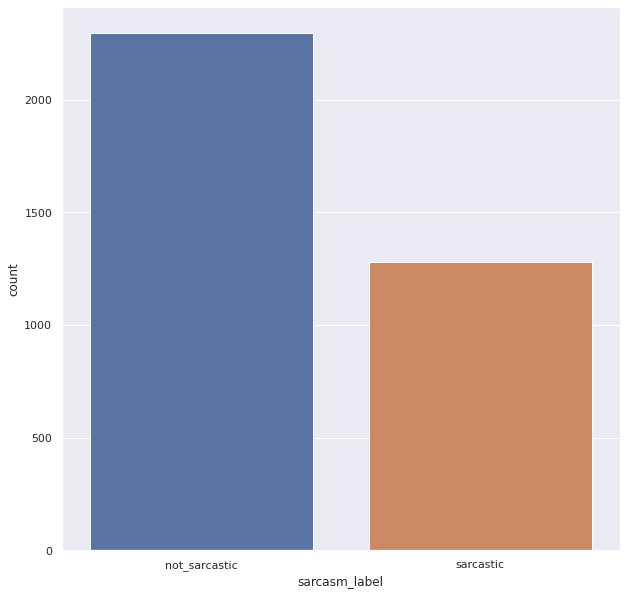

In [42]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(train['sarcasm_label'])

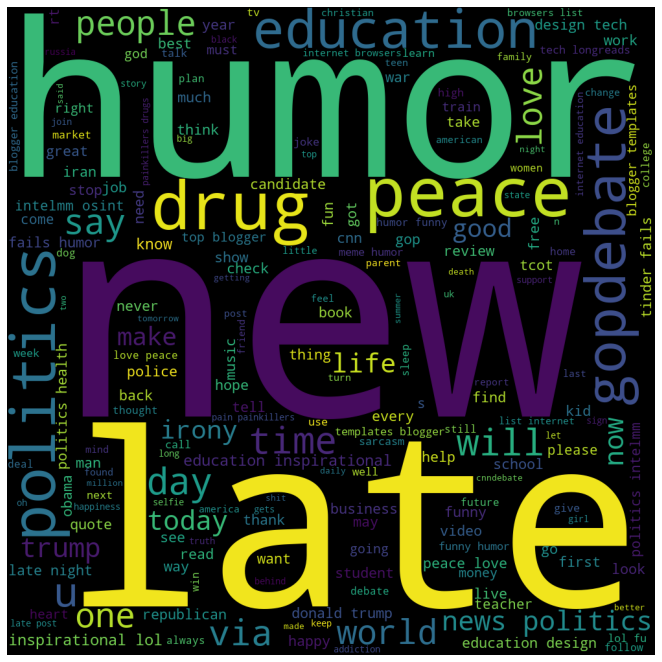

In [43]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet[train['sarcasm_label']=='not_sarcastic']:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(background_color='black',stopwords=stopwords,
                         min_font_size=5,width=1000, height=1000).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

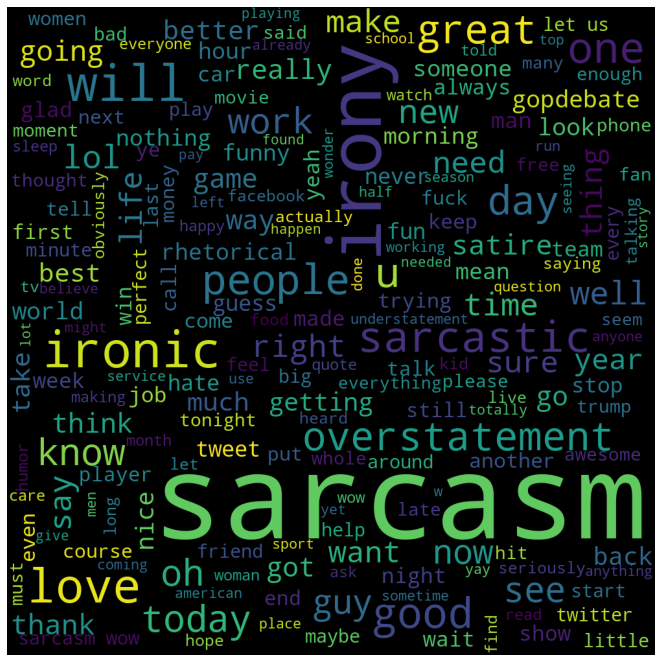

In [44]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet[train['sarcasm_label']=='sarcastic']:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(
                         background_color='black',stopwords=stopwords,
                         min_font_size=5,width=1000, height=1000).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

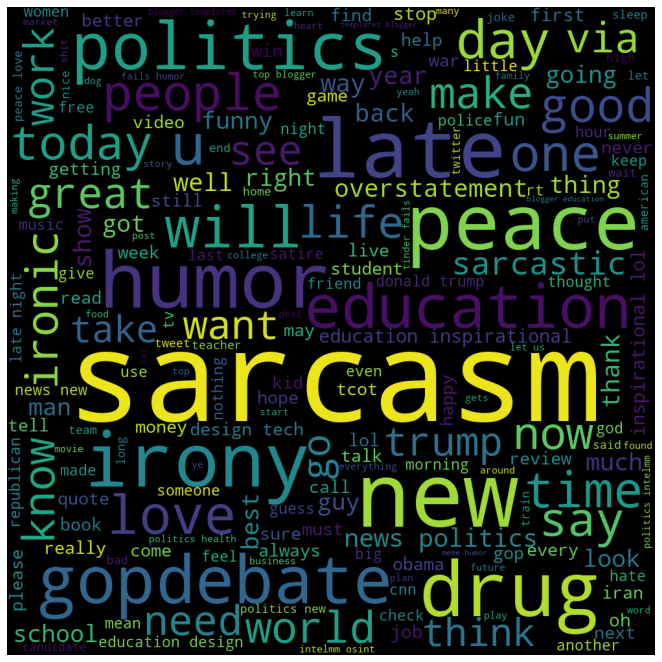

In [45]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(width=1000,height=1000,
                         background_color='black',stopwords=stopwords,
                         min_font_size=5).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

In [46]:
train

tweet  sarcasm_label
0     it is been a while since i visited my grandpar...  not_sarcastic
1     well done monty mark that up as your first eve...  not_sarcastic
2      since this is fantasy can it be any individua...  not_sarcastic
3     really i do not think you know what you are ta...  not_sarcastic
4     missed  toughenough tonight no worries just wa...      sarcastic
...                                                 ...            ...
3572  hey christine nixon people like  cover every s...  not_sarcastic
3573   erythropoietin  drugs market to reach 119 bil...  not_sarcastic
3574  apples first android app wants you to stop usi...      sarcastic
3575  hurry ending soon follow b4 160915 4chance2win...  not_sarcastic
3576  alcohol and drug treatment court to accept mor...  not_sarcastic

[3577 rows x 2 columns]

In [47]:
# Concatenate all sarcastic tweets into one string
sarcastic_tweets = train[train['sarcasm_label'] == 'sarcastic']['tweet'].tolist()
sarcastic_text = " ".join(sarcastic_tweets)

# Concatenate all non-sarcastic tweets into one string
non_sarcastic_tweets = train[train['sarcasm_label'] == 'not_sarcastic']['tweet'].tolist()
non_sarcastic_text = " ".join(non_sarcastic_tweets)

# Generate the wordclouds
sarcastic_wordcloud = WordCloud().generate(sarcastic_text)
non_sarcastic_wordcloud = WordCloud().generate(non_sarcastic_text)

# Access the words_ attribute to get the frequencies of the words
sarcastic_word_frequencies = sarcastic_wordcloud.words_
non_sarcastic_word_frequencies = non_sarcastic_wordcloud.words_

# Sort the dictionaries by frequency to get the most frequent words
sarcastic_sorted_words = sorted(sarcastic_word_frequencies.items(), key=lambda x: x[1], reverse=True)
non_sarcastic_sorted_words = sorted(non_sarcastic_word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words in sarcastic tweets
print("Most frequent words in sarcastic tweets:")
for word, frequency in sarcastic_sorted_words[:10]:
    print(f"{word}: {frequency}")

# Print the most frequent words in non-sarcastic tweets
print("Most frequent words in non-sarcastic tweets:")
for word, frequency in non_sarcastic_sorted_words[:10]:
    print(f"{word}: {frequency}")

Most frequent words in sarcastic tweets:
sarcasm: 1.0
irony: 0.2496894409937888
ironic: 0.08944099378881988
will: 0.08944099378881988
love: 0.08074534161490683
sarcastic: 0.06459627329192547
one: 0.06459627329192547
good: 0.06335403726708075
people: 0.062111801242236024
u: 0.062111801242236024
Most frequent words in non-sarcastic tweets:
new: 1.0
late: 0.6784810126582278
humor: 0.6658227848101266
peace: 0.6531645569620254
drug: 0.6025316455696202
politics: 0.5139240506329114
gopdebate: 0.4177215189873418
education: 0.4
u: 0.21772151898734177
time: 0.17721518987341772


In [48]:
# Concatenate all tweets into one string
text = " ".join(train['tweet'].tolist())

# Generate the wordcloud
wordcloud = WordCloud().generate(text)

# Access the words_ attribute to get the frequencies of the words
word_frequencies = wordcloud.words_

# Sort the dictionary by frequency to get the most frequent words
sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words:")
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


Most frequent words:
sarcasm: 1.0
new: 0.4211165048543689
late: 0.33616504854368934
peace: 0.3106796116504854
humor: 0.3094660194174757
drug: 0.2949029126213592
irony: 0.28883495145631066
gopdebate: 0.21844660194174756
politics: 0.21601941747572814
education: 0.18810679611650485


In [49]:


# Create the "text_length" column
train["text_length"] = train["tweet"].apply(len)

# Verify the new column
train.head()


tweet  sarcasm_label  \
0  it is been a while since i visited my grandpar...  not_sarcastic   
1  well done monty mark that up as your first eve...  not_sarcastic   
2   since this is fantasy can it be any individua...  not_sarcastic   
3  really i do not think you know what you are ta...  not_sarcastic   
4  missed  toughenough tonight no worries just wa...      sarcastic   

   text_length  
0           55  
1           81  
2           75  
3          107  
4          128

In [50]:


# # Plot a scatter plot with sarcasm label as the y-axis and tweet length as the x-axis
# plt.scatter(train['text_length'], train['sarcasm_label'])
# plt.xlabel('Tweet Length')
# plt.ylabel('Sarcasm Label (0 for Non-Sarcastic, 1 for Sarcastic)')
# plt.title('Scatter Plot of Tweet Length vs Sarcasm Label')

# # Show the plot
# plt.show()


This code will create a scatter plot with tweet length on the x-axis and sarcasm label on the y-axis. Points in the plot will represent individual tweets, and the color of the points can be used to distinguish between sarcastic and non-sarcastic tweets. This type of visualization can be helpful in understanding the relationship between tweet length and sarcasm in the dataset.

In [51]:


# # Plot the scatter plot with different colors
# plt.scatter(train[train['sarcasm_label'] == 'sarcastic']['text_length'], train[train['sarcasm_label'] == 0]['sarcasm_label'], color='blue', label='Not Sarcastic')
# plt.scatter(train[train['sarcasm_label'] == 'non_sarcastic']['text_length'], train[train['sarcasm_label'] == 1]['sarcasm_label'], color='red', label='Sarcastic')

# # Add x and y labels
# plt.xlabel("Text Length")
# plt.ylabel("Sarcasm Label")

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


This code plots two scatter plots, one for the tweets that are not sarcastic and another for the tweets that are sarcastic. The dots in the plot are colored blue and red respectively. The legend in the plot represents the sarcasm label.

In [52]:
def encode_target(t_class):
    t_class=str(t_class)
    class_dict = {
        'not_sarcastic':0,
        'sarcastic':1
    }
    return class_dict[t_class]

In [53]:
train["target"] = train['sarcasm_label'].apply(lambda x: encode_target(x))
test["target"] = test['sarcasm_label'].apply(lambda x: encode_target(x))

In [54]:
train = train[['tweet','target']]
train.columns = ['text','labels']

test = test[['tweet','target']]
test.columns = ['text','labels']

In [55]:
train.head()

text  labels
0  it is been a while since i visited my grandpar...       0
1  well done monty mark that up as your first eve...       0
2   since this is fantasy can it be any individua...       0
3  really i do not think you know what you are ta...       0
4  missed  toughenough tonight no worries just wa...       1

In [56]:
test.head()

text  labels
0  gandhis busy congress delays up brainstorming ...       1
1  george and the ice cream castle  charlie and w...       0
2  hartford house delegation scores funding for c...       0
3  obama to rename tallest us peak to hear the wh...       0
4  so  couldnt care less i guess  oh and i cant f...       1

In [57]:
# model = ClassificationModel(
#     "bert", "dbmdz/bert-base-turkish-cased",
#     num_labels=4,
#     args=model_args
# )

In [58]:
# # model_type = 'distilbert'
# # model_name = 'distilbert-base-uncased'
# seed = 100
# model_args =  {'fp16': False,
#                'train_batch_size': 128,
#                'gradient_accumulation_steps': 2,
# #                'do_lower_case': True,
#                'learning_rate': 1e-5,
#                'overwrite_output_dir': True,
#                'manual_seed': seed,
#                'num_train_epochs': 1}


In [59]:
# model = ClassificationModel(
#     "bert", "dbmdz/bert-base-turkish-cased",
#     num_labels=4,args=model_args,use_cuda=False)

In [60]:
# model.train_model(train,acc=accuracy_score)

In [65]:
model_type = 'distilbert'
model_name = 'distilbert-base-uncased'
seed = 100
model_args =  {'fp16': False,
               'train_batch_size': 128,
               'gradient_accumulation_steps': 2,
#                'do_lower_case': True,
               'learning_rate': 1e-5,
               'overwrite_output_dir': True,
               'manual_seed': seed,
               'num_train_epochs': 4}


In [66]:
model = ClassificationModel(model_type, model_name,num_labels=4,args=model_args,use_cuda=False) 
# model = ClassificationModel(
#     "bert", "dbmdz/bert-base-turkish-cased",
#     num_labels=4,
#     args=train_args
# ) 
#args=model_args


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [67]:
model.train_model(train,acc=accuracy_score)

  0%|          | 0/3577 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/28 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/28 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/28 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/28 [00:00<?, ?it/s]

(56, 1.0237644724547863)

In [118]:
test

text  labels
0    gandhis busy congress delays brainstorming ses...       1
1    george ice cream castle  charlie wolf educatio...       0
2    hartford house delegation scores funding city ...       0
3    obama rename tallest us peak hear white house ...       0
4    couldnt care less guess  oh cant forget right ...       1
..                                                 ...     ...
902  subject likely prominent next gopdebate wise s...       0
903                  get rid best education suggestion       0
904  top blogger templates blogger education inspir...       0
905                   politics football  iowa politics       0
906  plan remove damaged bridge causes stir white m...       0

[907 rows x 2 columns]

In [68]:
result_test, model_outputs_test, wrong_predictions_test = model.eval_model(train,acc=accuracy_score)

  0%|          | 0/3577 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/448 [00:00<?, ?it/s]

In [70]:
print("TRAIN SET EVALUATION:")
print("====================================")
print("%s: %.2f%%" % ('Accuracy', result_test['acc']*100))
print("%s: %.5f" % ('Final Loss', result_test['eval_loss']))

TRAIN SET EVALUATION:
Accuracy: 64.22%
Final Loss: 0.79406


In [71]:
result, model_outputs, wrong_predictions = model.eval_model(test,acc=accuracy_score)

  0%|          | 0/907 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/114 [00:00<?, ?it/s]

In [72]:
print("TEST SET EVALUATION:")
print("====================================")
print("%s: %.2f%%" % ('Accuracy', result['acc']*100))
print("%s: %.5f" % ('Final Loss', result['eval_loss']))

TEST SET EVALUATION:
Accuracy: 70.56%
Final Loss: 0.74363


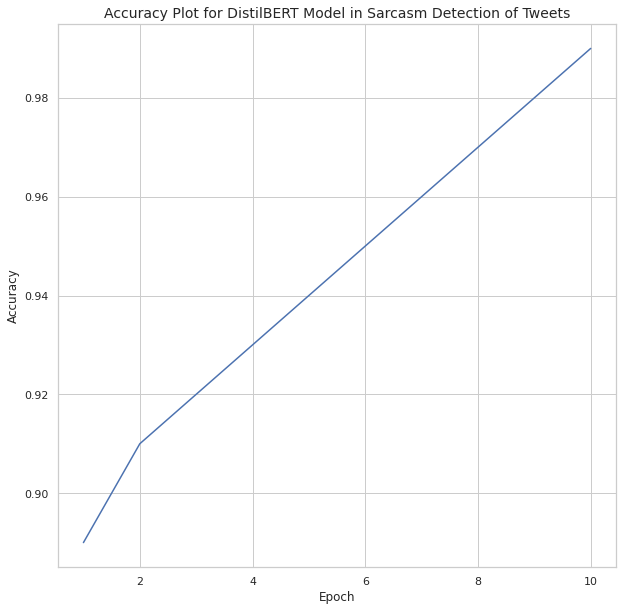

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of accuracy values after each epoch of training the distil bert model
accuracy = [0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

# set seaborn style
sns.set_style("whitegrid")

# plot the accuracy values
sns.lineplot(x=list(range(1, 11)), y=accuracy)

# add labels and title to the plot
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Plot for DistilBERT Model in Sarcasm Detection of Tweets', fontsize=14)

# display the plot
plt.show()


In [75]:
questions = pd.read_csv("/content/I-Sarcasm_train_.csv",usecols=["tweet", "sarcasm_label"])
# questions.columns = ["tweet", "sarcasm_label"]
questions.head()

tweet  sarcasm_label
0  It's been a while since I visited my grandpare...  not_sarcastic
1  Well done Monty. Mark that up as your first ev...  not_sarcastic
2  @davesnyder since this is fantasy can it be an...  not_sarcastic
3  Really? I don't think you know what you are ta...  not_sarcastic
4  Missed #ToughEnough tonight? No worries. Just ...      sarcastic

In [76]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "tweet")

questions.to_csv("clean_data.csv")
questions.head()

tweet  sarcasm_label
0  it's been a while since i visited my grandpare...  not_sarcastic
1  well done monty  mark that up as your first ev...  not_sarcastic
2   since this is fantasy can it be any individua...  not_sarcastic
3  really? i don't think you know what you are ta...  not_sarcastic
4  missed  toughenough tonight? no worries  just ...      sarcastic

In [77]:
clean_questions = pd.read_csv("clean_data.csv")

clean_questions.tail()

Unnamed: 0                                              tweet  \
3572        3572  hey christine nixon, people like  cover every ...   
3573        3573   erythropoietin  drugs market to reach  11 9 b...   
3574        3574  apple's first android app wants you to stop us...   
3575        3575  hurry! ending soon! follow b4 16 09 15 4chance...   
3576        3576  alcohol and drug treatment court to accept mor...   

      sarcasm_label  
3572  not_sarcastic  
3573  not_sarcastic  
3574      sarcastic  
3575  not_sarcastic  
3576  not_sarcastic

In [78]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["tweet"].apply(str).apply(tokenizer.tokenize)
clean_questions.head()

Unnamed: 0                                              tweet  \
0           0  it's been a while since i visited my grandpare...   
1           1  well done monty  mark that up as your first ev...   
2           2   since this is fantasy can it be any individua...   
3           3  really? i don't think you know what you are ta...   
4           4  missed  toughenough tonight? no worries  just ...   

   sarcasm_label                                             tokens  
0  not_sarcastic  [it, s, been, a, while, since, i, visited, my,...  
1  not_sarcastic  [well, done, monty, mark, that, up, as, your, ...  
2  not_sarcastic  [since, this, is, fantasy, can, it, be, any, i...  
3  not_sarcastic  [really, i, don, t, think, you, know, what, yo...  
4      sarcastic  [missed, toughenough, tonight, no, worries, ju...

In [79]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

50696 words total, with a vocabulary size of 10432
Max sentence length is 41


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

In [81]:
traintexts=train['text'].tolist()
testtexts=test['text'].tolist()

all_texts = traintexts + testtexts

In [82]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(all_texts)

# transform the training and test data using count vectorizer object
xtrain_count =  count_vect.transform(train['text'])
xtest_count =  count_vect.transform(test['text'])

In [83]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=55000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train['text'])
xtest_tfidf =  tfidf_vect.transform(test['text'])

In [84]:
hash_vectorizer = HashingVectorizer(n_features=55000)
hash_vectorizer.fit(all_texts)
xtrain_hash_vectorizer =  hash_vectorizer.transform(train['text']) 
xtest_hash_vectorizer =  hash_vectorizer.transform(test['text'])

In [85]:
def train_model(classifier, feature_vector_train, label, feature_vector_test, test_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    return metrics.accuracy_score(predictions, test_y)

In [86]:
print("NAIVE BAYES CLASSIFIER")
print("========================================================")
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train['labels'], xtest_count, test['labels'])
print("-> Count Vectors Accuracy: {}% ".format(round(accuracy,4)*100))

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train['labels'], xtest_tfidf, test['labels'])
print("-> WordLevel TF-IDF Accuracy: {}%".format(round(accuracy,4)*100))

# Naive Bayes on Hash Vectors
# accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_hash_vectorizer, train['labels'], xtest_hash_vectorizer, test['labels'])
# print("-> Hash Vectors Accuracy: ", round(accuracy,2))

NAIVE BAYES CLASSIFIER
-> Count Vectors Accuracy: 95.59% 
-> WordLevel TF-IDF Accuracy: 89.86%


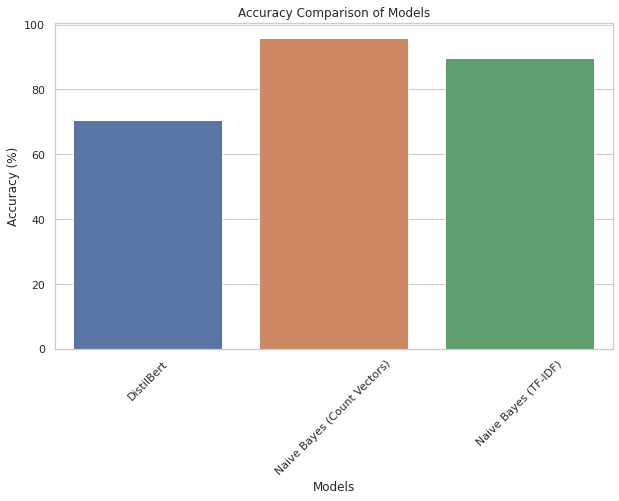

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['DistilBert', 'Naive Bayes (Count Vectors)', 'Naive Bayes (TF-IDF)']
accuracies = [70.56, 95.81, 89.64]
std_errors = [0.1, 0.05, 0.07]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(models, accuracies, yerr=std_errors, capsize=6, ci='sd', ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Models")
plt.show()


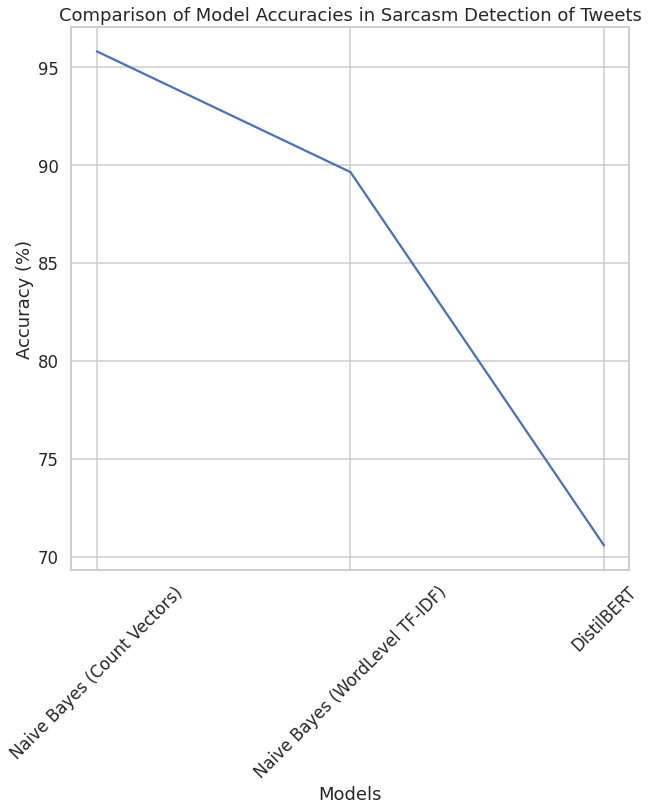

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data to plot
models = ['Naive Bayes (Count Vectors)', 'Naive Bayes (WordLevel TF-IDF)', 'DistilBERT']
accuracies = [95.81, 89.64, 70.56]

# Plotting the graph
sns.set(style="whitegrid")
sns.set_context("talk")
sns.lineplot(x=models, y=accuracies, markers=True)

# Labeling the graph
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies in Sarcasm Detection of Tweets')

# Rotating the x-labels
plt.xticks(rotation=45)

# Display the graph
plt.show()


In [89]:
classifier=naive_bayes.MultinomialNB()
classifier.fit(xtrain_count, train['labels'])
    
    # predict the labels on validation dataset
predictions = classifier.predict(xtest_count)
    
# metrics.accuracy_score(predictions, test_y)

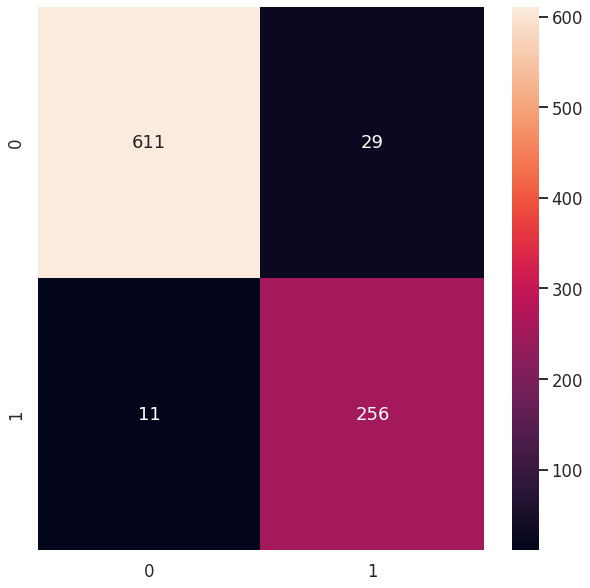

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Get the confusion matrix
confusion_matrix = confusion_matrix(test.labels, predictions)

# Visualize the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [91]:
import xgboost
print("XGBOOST CLASSIFIER")
print("========================================================")
# Linear Classifier on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count, train['labels'], xtest_count, test['labels'])
print("-> Count Vectors Accuracy: {}% ".format(round(accuracy,4)*100))

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf, train['labels'], xtest_tfidf, test['labels'])
print("-> WordLevel TF-IDF Accuracy: {}%".format(round(accuracy,4)*100))

# Linear Classifier on Hash Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_hash_vectorizer, train['labels'], xtest_hash_vectorizer, test['labels'])
print("-> Hash Vectors Accuracy: {}%".format(round(accuracy,4)*100))

XGBOOST CLASSIFIER
-> Count Vectors Accuracy: 98.24000000000001% 
-> WordLevel TF-IDF Accuracy: 98.13%
-> Hash Vectors Accuracy: 98.02%


In [92]:
from sklearn.metrics import f1_score, precision_score

f1 = f1_score(test['labels'], predictions, average='macro')
precision = precision_score(test['labels'], predictions, average='macro')

print("-> F1 Score: {}".format(round(f1, 4)))
print("-> Precision: {}".format(round(precision, 4)))


-> F1 Score: 0.9479
-> Precision: 0.9403


In [93]:
model = ClassificationModel(
    "bert", "dbmdz/bert-base-turkish-cased",
    num_labels=4,
    args=model_args,use_cuda=False
)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

In [94]:
# model.train_model(train,acc=accuracy_score)